# IntelliLog-AI | Notebook 01: Exploratory Data Analysis (EDA)


Objective:
---------
Perform data exploration and validation on simulated delivery order data generated by `src/etl/ingest.py`.

We will:
- Load raw order data
- Check schema, missing values, and distributions
- Visualize traffic, weather, and delivery patterns
- Understand relationships between features and target (`delivery_time_min`)


__author__ = "Vivek Yadav"
__project__ = "IntelliLog-AI"
__version__ = "v0.1"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime



In [2]:
# Optional: style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Display all columns
pd.set_option("display.max_columns", None)


In [3]:
# Load the simulated dataset
data_path = "../data/raw_orders.csv"
df = pd.read_csv(data_path, parse_dates=["order_time"])

print("✅ Data loaded successfully.")
print("Shape:", df.shape)
df.head()


✅ Data loaded successfully.
Shape: (500, 9)


,order_id,lat,lon,order_time,distance_km,traffic,weather,order_type,delivery_time_min
0,O00000,13.045734,77.594235,2025-10-09 02:05:18.607473,2.74,low,clear,express,5.00
1,O00001,12.966917,77.626184,2025-10-08 18:18:18.607473,10.51,low,clear,normal,24.09
2,O00002,13.026411,77.607851,2025-10-08 19:23:18.607473,0.61,high,storm,normal,5.00
3,O00003,12.997534,77.562502,2025-10-08 23:51:18.607473,0.50,medium,clear,normal,5.00
4,O00004,12.953440,77.566354,2025-10-08 21:50:18.607473,4.61,low,clear,normal,9.50


In [4]:
# Basic info
df.info()

# Summary statistics
display(df.describe(include="all"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           500 non-null    object        
 1   lat                500 non-null    float64       
 2   lon                500 non-null    float64       
 3   order_time         500 non-null    datetime64[ns]
 4   distance_km        500 non-null    float64       
 5   traffic            500 non-null    object        
 6   weather            500 non-null    object        
 7   order_type         500 non-null    object        
 8   delivery_time_min  500 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 35.3+ KB


,order_id,lat,lon,order_time,distance_km,traffic,weather,order_type,delivery_time_min
count,500,500.000000,500.000000,500,500.000000,500,500,500,500.000000
unique,500,NaN,NaN,NaN,NaN,3,3,2,NaN
top,O00000,NaN,NaN,NaN,NaN,low,storm,express,NaN
freq,1,NaN,NaN,NaN,NaN,173,178,273,NaN
mean,NaN,12.982663,77.606023,2025-10-09 00:21:21.607473152,3.018760,NaN,NaN,NaN,10.244080
min,NaN,12.876392,77.543062,2025-10-08 18:12:18.607473,0.500000,NaN,NaN,NaN,5.000000
25%,NaN,12.944642,77.588457,2025-10-08 19:45:03.607472896,0.937500,NaN,NaN,NaN,5.000000
50%,NaN,12.976073,77.605288,2025-10-08 22:33:48.607472896,2.245000,NaN,NaN,NaN,6.600000
75%,NaN,13.025926,77.623504,2025-10-09 02:46:33.607472896,4.370000,NaN,NaN,NaN,12.350000
max,NaN,13.079065,77.675702,2025-10-10 14:50:18.607473,14.220000,NaN,NaN,NaN,55.570000


In [5]:
print("Missing values per column:")
print(df.isnull().sum())

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Missing values per column:
order_id             0
lat                  0
lon                  0
order_time           0
distance_km          0
traffic              0
weather              0
order_type           0
delivery_time_min    0
dtype: int64
Number of duplicate rows: 0


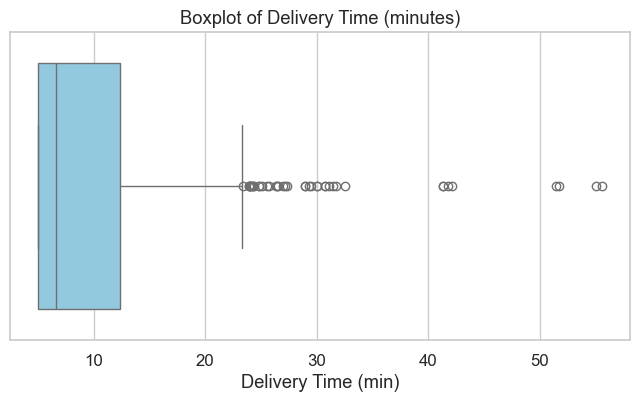

In [6]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["delivery_time_min"], color="skyblue")
plt.title("Boxplot of Delivery Time (minutes)")
plt.xlabel("Delivery Time (min)")
plt.show()


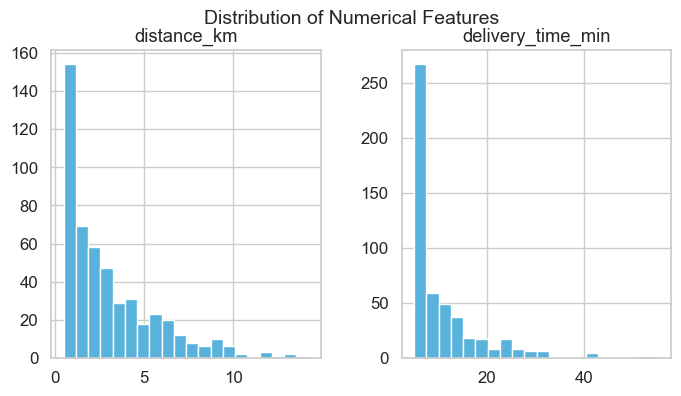

In [7]:
num_cols = ["distance_km", "delivery_time_min"]
df[num_cols].hist(figsize=(8,4), bins=20, color="#58b2dc")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()


C:\Users\vivek\AppData\Local\Temp\ipykernel_50576\1459682257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="traffic", data=df, ax=axes[0], palette="cool")
C:\Users\vivek\AppData\Local\Temp\ipykernel_50576\1459682257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="weather", data=df, ax=axes[1], palette="cool")
C:\Users\vivek\AppData\Local\Temp\ipykernel_50576\1459682257.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="order_type", data=df, ax=axes[2], palette="cool")


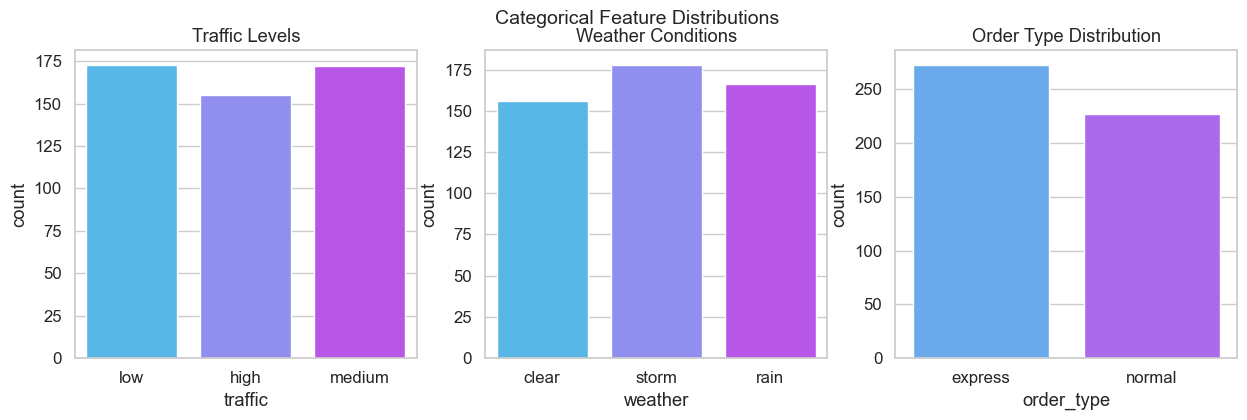

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(x="traffic", data=df, ax=axes[0], palette="cool")
sns.countplot(x="weather", data=df, ax=axes[1], palette="cool")
sns.countplot(x="order_type", data=df, ax=axes[2], palette="cool")
axes[0].set_title("Traffic Levels")
axes[1].set_title("Weather Conditions")
axes[2].set_title("Order Type Distribution")
plt.suptitle("Categorical Feature Distributions", fontsize=14)
plt.show()


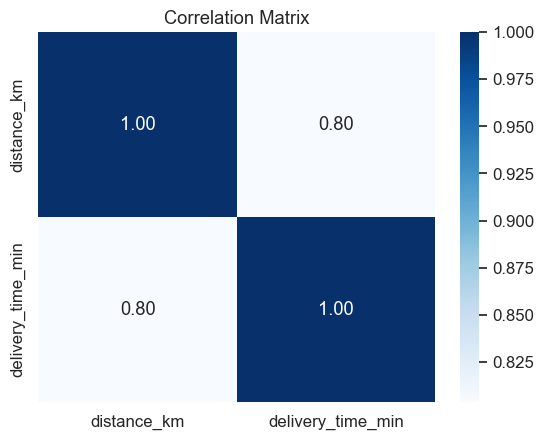

In [9]:
corr = df[["distance_km", "delivery_time_min"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


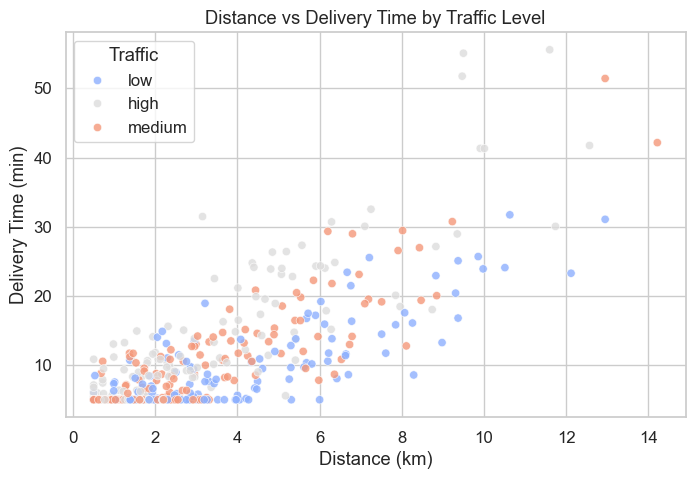

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="distance_km",
    y="delivery_time_min",
    hue="traffic",
    palette="coolwarm",
    alpha=0.8
)
plt.title("Distance vs Delivery Time by Traffic Level")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.legend(title="Traffic")
plt.show()


In [11]:
fig = px.scatter(
    df,
    x="distance_km",
    y="delivery_time_min",
    color="weather",
    size="distance_km",
    hover_data=["order_id", "traffic", "order_type"],
    title="Interactive Scatter: Delivery Time vs Distance"
)
fig.show()


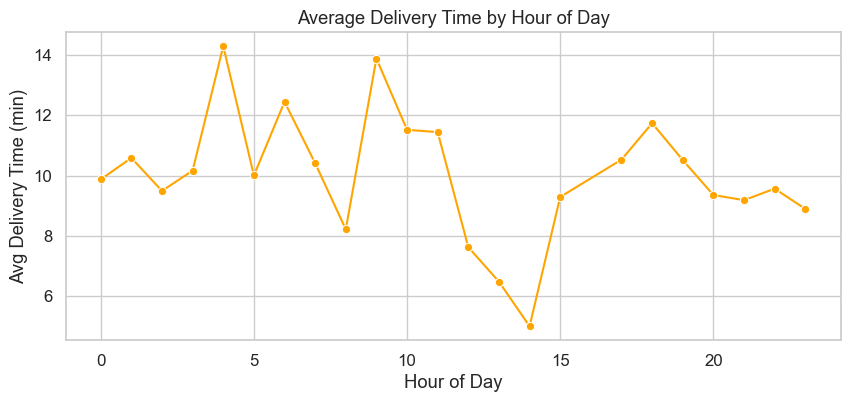

In [12]:
df["hour"] = df["order_time"].dt.hour
hourly_avg = df.groupby("hour")["delivery_time_min"].mean().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(x="hour", y="delivery_time_min", data=hourly_avg, marker="o", color="orange")
plt.title("Average Delivery Time by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Delivery Time (min)")
plt.grid(True)
plt.show()


C:\Users\vivek\AppData\Local\Temp\ipykernel_50576\2056936783.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




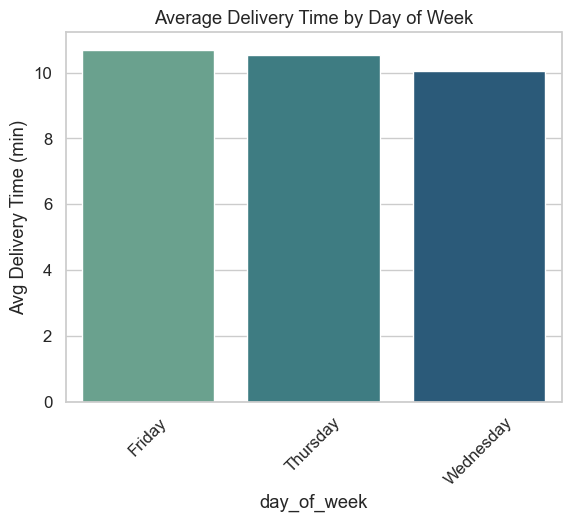

In [13]:
df["day_of_week"] = df["order_time"].dt.day_name()
dow_avg = df.groupby("day_of_week")["delivery_time_min"].mean().reset_index()

sns.barplot(x="day_of_week", y="delivery_time_min", data=dow_avg, palette="crest")
plt.title("Average Delivery Time by Day of Week")
plt.xticks(rotation=45)
plt.ylabel("Avg Delivery Time (min)")
plt.show()


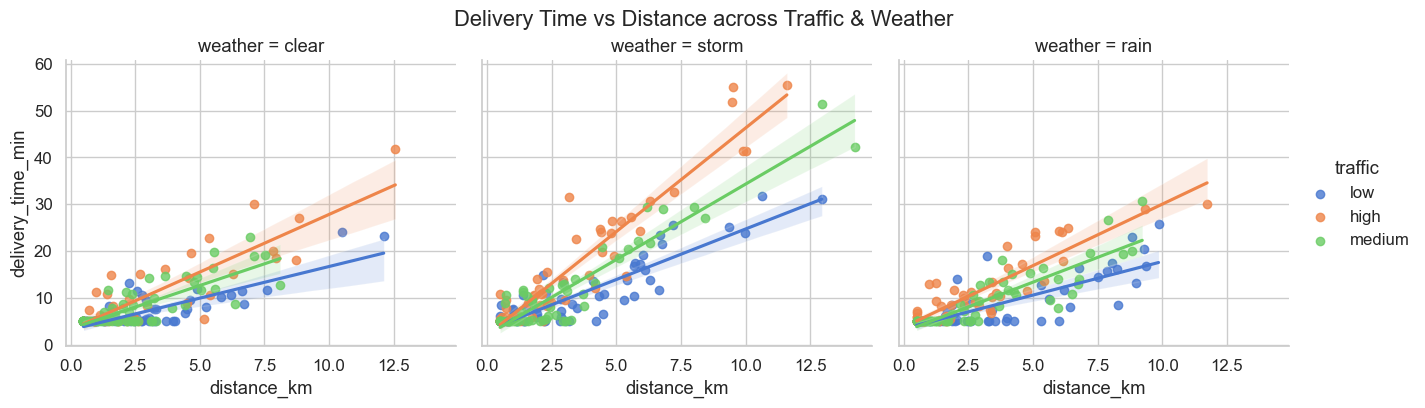

In [14]:
sns.lmplot(
    x="distance_km", y="delivery_time_min",
    hue="traffic", col="weather",
    data=df, aspect=1.1, height=4
)
plt.suptitle("Delivery Time vs Distance across Traffic & Weather", y=1.02)
plt.show()


In [15]:
outliers = df[df["delivery_time_min"] > df["delivery_time_min"].quantile(0.99)]
print(f"Outliers (>99th percentile): {len(outliers)} rows")
display(outliers.head())


Outliers (>99th percentile): 5 rows


,order_id,lat,lon,order_time,distance_km,traffic,weather,order_type,delivery_time_min,hour,day_of_week
75,O00075,13.025661,77.587579,2025-10-08 18:42:18.607473,12.95,medium,storm,normal,51.42,18,Wednesday
267,O00267,13.004382,77.628154,2025-10-09 01:15:18.607473,14.22,medium,storm,express,42.15,1,Thursday
368,O00368,12.991566,77.585968,2025-10-08 22:00:18.607473,11.60,high,storm,normal,55.57,22,Wednesday
433,O00433,12.944008,77.582066,2025-10-08 19:36:18.607473,9.47,high,storm,normal,51.75,19,Wednesday
469,O00469,13.002936,77.593483,2025-10-08 18:32:18.607473,9.50,high,storm,normal,55.07,18,Wednesday


In [16]:
print("📊 EDA Summary Insights:")
print("- Total records:", len(df))
print("- Average delivery time:", round(df['delivery_time_min'].mean(), 2), "min")
print("- Longest delivery time:", df['delivery_time_min'].max(), "min")
print("- Most common traffic condition:", df['traffic'].mode()[0])
print("- Most common weather condition:", df['weather'].mode()[0])
print("- Peak delivery hour:", df['hour'].mode()[0])


📊 EDA Summary Insights:
- Total records: 500
- Average delivery time: 10.24 min
- Longest delivery time: 55.57 min
- Most common traffic condition: low
- Most common weather condition: storm
- Peak delivery hour: 18


In [18]:
eda_report_path = "../data/processed/eda_summary.csv"
summary = {
    "total_rows": len(df),
    "avg_delivery_time": round(df["delivery_time_min"].mean(), 2),
    "max_delivery_time": df["delivery_time_min"].max(),
    "common_traffic": df["traffic"].mode()[0],
    "common_weather": df["weather"].mode()[0],
    "peak_hour": df["hour"].mode()[0],
}
pd.DataFrame([summary]).to_csv(eda_report_path, index=False)
print(f"✅ EDA summary exported to {eda_report_path}")


✅ EDA summary exported to ../data/processed/eda_summary.csv
